## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

## Importing Dataset

In [2]:
df = pd.read_csv('car_data.csv')
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
df.shape

(1000, 5)

## Exploratory Data Analysis

### Univariate Analysis

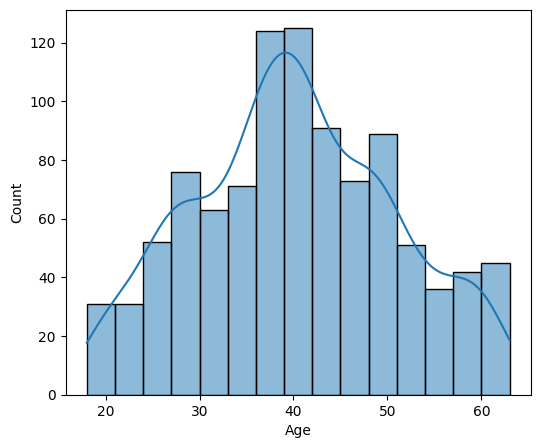

In [4]:
fig = plt.figure(figsize = (6, 5))
sns.histplot(data = df, x = 'Age', kde = True)
plt.show()

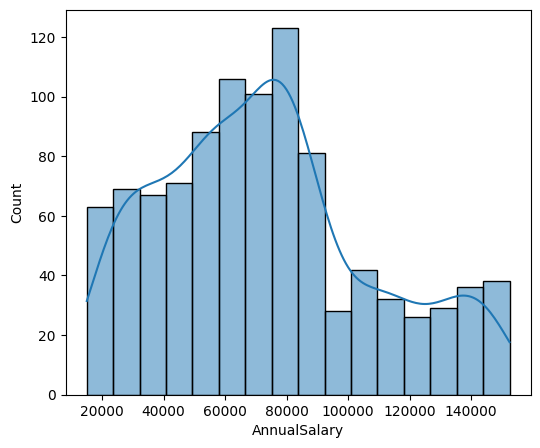

In [5]:
fig = plt.figure(figsize = (6, 5))
sns.histplot(data = df, x = 'AnnualSalary', kde = True)
plt.show()

### Bivariate Analysis

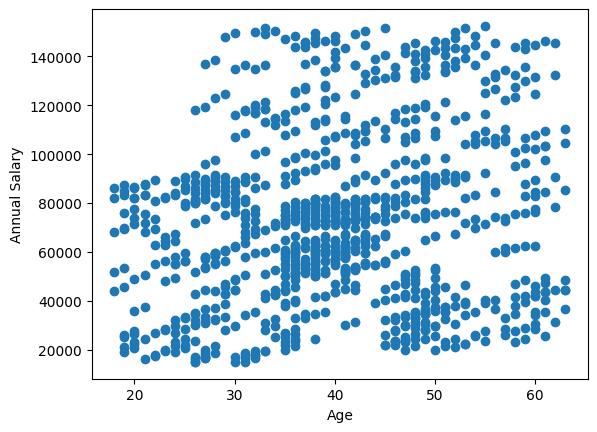

In [6]:
#age vs annualSalary
plt.scatter(data = df, x = 'Age', y = 'AnnualSalary')
plt.xlabel('Age')
plt.ylabel('Annual Salary')
plt.show()

### Multivariate Plot

<ipython-input-7-ec105996011b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


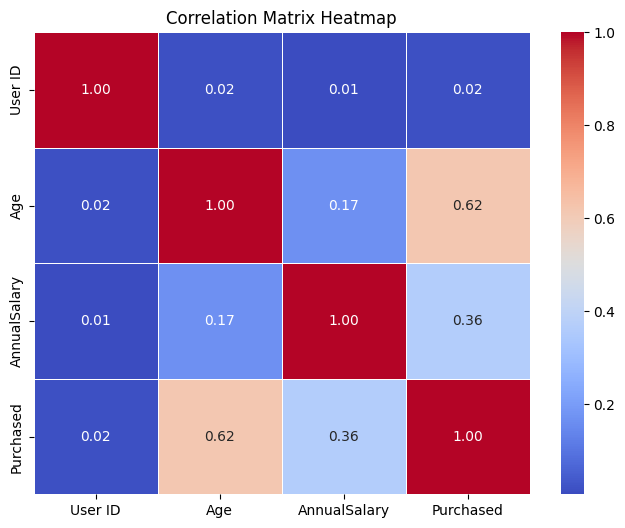

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Descriptive Analysis

In [8]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


## Data Preprocessing

### Handling Missing Values

In [9]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

### Detecting Outliers

<Axes: >

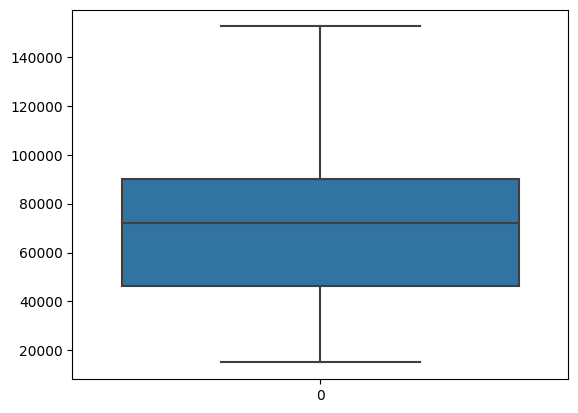

In [10]:
sns.boxplot(data = df['AnnualSalary'])

<Axes: >

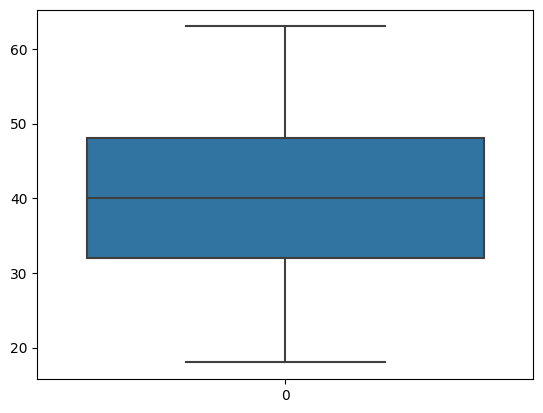

In [11]:
sns.boxplot(data = df['Age'])

### Extracting Values

In [12]:
X = df[['User ID', 'Gender', 'Age', 'AnnualSalary']].values
y = df['Purchased'].values

### Label Encoding Categorical Variables

In [13]:
from sklearn import preprocessing

le_Sex = preprocessing.LabelEncoder()
le_Sex.fit(['Female', 'Male'])
X[:,1] = le_Sex.transform(X[:,1])

### Splitting in Train and Test Data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Train Data Size: ', X_train.shape)
print('Test Data Size: ', X_test.shape)

Train Data Size:  (800, 4)
Test Data Size:  (200, 4)


## Model Building

### Decision Tree Classifier

In [15]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.model_selection import cross_val_score

In [16]:
#building the model

model1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
model1

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [17]:
# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(model1, X, y, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Calculate and print the average accuracy across all folds
print("Average accuracy: {:.2f}".format(cross_val_scores.mean()))

Cross-validation scores: [0.92 0.86 0.94 0.87 0.93 0.92 0.87 0.91 0.9  0.94]
Average accuracy: 0.91


In [18]:
#fitting the model

model1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [19]:
#predicting for both train and test sets
model1pred_train = model1.predict(X_train)
model1pred_test = model1.predict(X_test)

In [20]:
# Model Evaluation

print("DecisionTrees's Accuracy: ", accuracy_score(y_test, model1pred_test))

DecisionTrees's Accuracy:  0.9


In [21]:
#finding out classification report for both train and test sets

report1 = classification_report(y_train, model1pred_train)

print("Train Set Classification Report:")
print(report1)

report2 = classification_report(y_test, model1pred_test)

print("Test Set Classification Report:")
print(report2)

Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       486
           1       0.89      0.89      0.89       314

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       112
           1       0.91      0.85      0.88        88

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.90       200
weighted avg       0.90      0.90      0.90       200



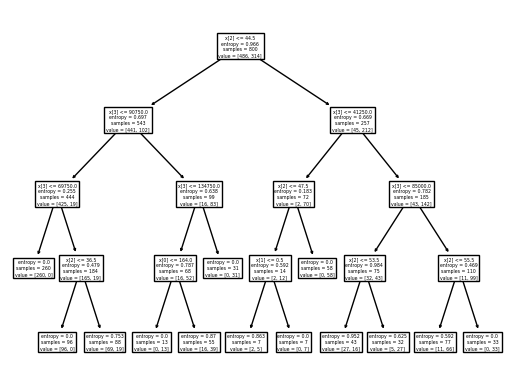

In [22]:
#visualizing the decision tree

tree.plot_tree(model1)
plt.show()

### SVC Classifier

In [23]:
#importing libraries
from sklearn.svm import SVC

In [24]:
#building the model

model2 = SVC(kernel = 'linear', random_state = 42)
model2.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [25]:
#predicting values for both train and test sets

y_test_pred = model2.predict(X_test)
y_train_pred = model2.predict(X_train)

In [26]:
#finding out classification report for both train and test sets

report1 = classification_report(y_train, y_train_pred)

print("Train Set Classification Report:")
print(report1)

report2 = classification_report(y_test, y_test_pred)

print("Test Set Classification Report:")
print(report2)

Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       486
           1       0.81      0.72      0.76       314

    accuracy                           0.82       800
   macro avg       0.82      0.81      0.81       800
weighted avg       0.82      0.82      0.82       800

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       112
           1       0.86      0.64      0.73        88

    accuracy                           0.80       200
   macro avg       0.81      0.78      0.78       200
weighted avg       0.81      0.80      0.79       200



## Saving the Model

In [27]:
#libraries
import pickle

In [28]:
#dumping model
pickle.dump(model1, open('/content/DTModel', 'wb'))